In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile

In [11]:
# Step 1: Download the dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=False)


In [12]:
# Step 2: Extract the dataset
base_dir = os.path.join(os.path.dirname(dataset_path), 'cats_and_dogs_filtered')
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(dataset_path))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print("✅ Dataset extracted successfully!")
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)


✅ Dataset extracted successfully!
Train directory: /root/.keras/datasets/cats_and_dogs_filtered/train
Validation directory: /root/.keras/datasets/cats_and_dogs_filtered/validation


In [13]:
# Step 3: Data Preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Step 4: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Step 6: Train the model
history = model.fit(
    train_generator,
    epochs=5,  # You can increase to 10 for better accuracy
    validation_data=validation_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5310 - loss: 0.7845 - val_accuracy: 0.6130 - val_loss: 0.6798
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5966 - loss: 0.6661 - val_accuracy: 0.5730 - val_loss: 0.6363
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.6530 - loss: 0.6087 - val_accuracy: 0.6720 - val_loss: 0.5904
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7418 - loss: 0.5251 - val_accuracy: 0.7070 - val_loss: 0.5757
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7614 - loss: 0.4925 - val_accuracy: 0.7230 - val_loss: 0.5590


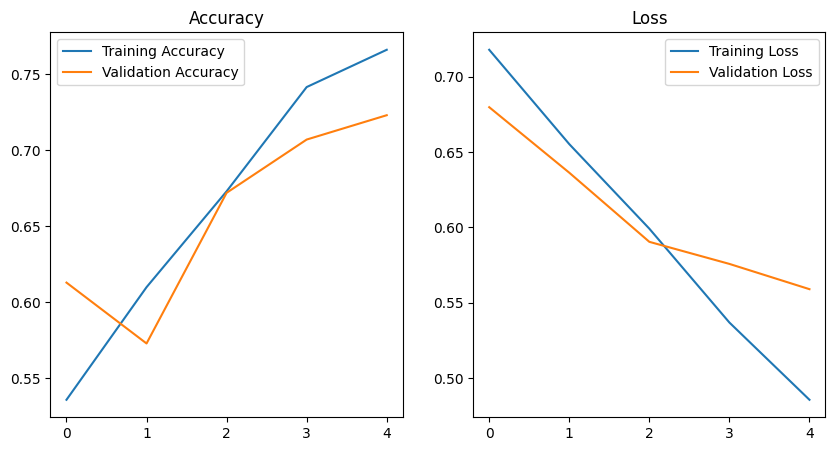

In [17]:
# Step 7: Plot training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [18]:
# Step 8: Save the trained model
model.save("cat_dog_classifier.h5")

print("✅ Model trained and saved successfully!")

✅ Model trained and saved successfully!


Saving gettyimages-586890581.avif to gettyimages-586890581.avif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Prediction for gettyimages-586890581.avif:
🐶 Predicted: Dog


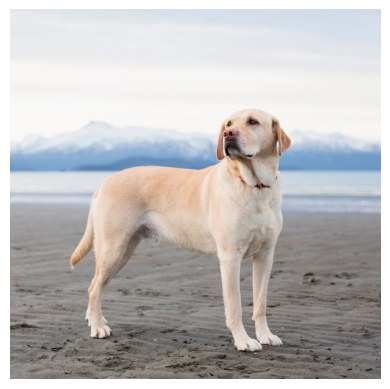

In [21]:
# ============================================================
# 🧪 Step 9: Test prediction on your own uploaded image
# ============================================================

from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Upload your own image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]

    # Display result
    print(f"\nPrediction for {filename}:")
    if prediction > 0.5:
        print("🐶 Predicted: Dog")
    else:
        print("🐱 Predicted: Cat")

    # Show image
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.show()
